In [1]:
import math
import numpy as np
import pandas as pd 

import torch
import torch.nn as nn
import torch.functional as F


import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [4]:

def convex_function(row):
    x,y = row
    z = 2*math.log(x**2+y**2+0.2) + 2
    return z

data_points = np.random.rand(300,2)*20 - 10
z = np.apply_along_axis(convex_function, 1, data_points)
dataset = torch.from_numpy(np.insert(data_points,0, z, axis=1)).float()
shuffled_ind = torch.randperm(dataset.size(0))
dataset = dataset[shuffled_ind][:]


Text(0.5, 0, 'X Label')

Text(0.5, 0, 'Y Label')

Text(0.5, 0, 'Z Label')

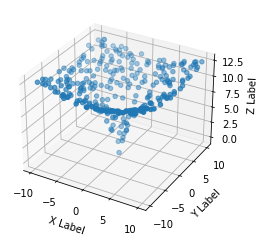

In [5]:

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
xs = dataset[:, 1]
ys = dataset[:, 2]
zs = dataset[:, 0]
ax.scatter(xs, ys, zs, marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()


In [35]:

class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.input = torch.nn.Linear(in_features=2, out_features=8)
        self.fc1 = torch.nn.Linear(8, 4)
        self.bn = torch.nn.LayerNorm(8)
        self.out = torch.nn.Linear(4,1)
    
    def forward(self, x):
        x = torch.nn.functional.relu(self.bn(self.input(x)))
        x = torch.nn.functional.relu(self.fc1(x))
        x = self.out(x)
        return x

model = SimpleNN()
model


SimpleNN(
  (input): Linear(in_features=2, out_features=8, bias=True)
  (fc1): Linear(in_features=8, out_features=4, bias=True)
  (bn): LayerNorm((8,), eps=1e-05, elementwise_affine=True)
  (out): Linear(in_features=4, out_features=1, bias=True)
)

In [36]:

criterion = torch.nn.MSELoss()
#criterion = nn.NLLLoss()

optimizer = torch.optim.SGD(model.parameters(), lr=0.0001, momentum=0.9)


In [37]:

epochs = 30
for epoch in range(epochs):
    avg_loss = i = 0
    for row in dataset:
        inputs, labels = row[1:], row[0]
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        avg_loss+=loss.item()
        i+=1
    avg_loss = avg_loss/i
    print(f"Loss in epoch {epoch} : {avg_loss}")
print('Finished Training')


Loss in epoch 0 : 34.21995518089467
Loss in epoch 1 : 4.480850467257648
Loss in epoch 2 : 3.239886245393394
Loss in epoch 3 : 1.3197544294673935
Loss in epoch 4 : 0.5353495186993921
Loss in epoch 5 : 0.3411643779232001
Loss in epoch 6 : 0.28036339165570096
Loss in epoch 7 : 0.2524584673429642
Loss in epoch 8 : 0.23057015210337037
Loss in epoch 9 : 0.21526239147973683
Loss in epoch 10 : 0.20110079982931608
Loss in epoch 11 : 0.18575911251542795
Loss in epoch 12 : 0.17522708304042076
Loss in epoch 13 : 0.16557828272460332
Loss in epoch 14 : 0.15548659169673254
Loss in epoch 15 : 0.14681121990461785
Loss in epoch 16 : 0.13613054809689554
Loss in epoch 17 : 0.13225171919420367
Loss in epoch 18 : 0.1295656995796647
Loss in epoch 19 : 0.1229661179651915
Loss in epoch 20 : 0.12078233115732473
Loss in epoch 21 : 0.11826536458122064
Loss in epoch 22 : 0.11460956711467285
Loss in epoch 23 : 0.1151026195824185
Loss in epoch 24 : 0.11271463426870772
Loss in epoch 25 : 0.1106513521865448
Loss in ep

In [38]:

model.state_dict()


OrderedDict([('input.weight',
              tensor([[-0.0623, -0.1059],
                      [-0.1156,  0.1789],
                      [ 0.3395,  0.4233],
                      [ 0.1479,  0.1234],
                      [ 0.3050, -0.2860],
                      [ 0.1954,  0.1163],
                      [ 0.5205,  0.1210],
                      [ 0.2485, -0.0892]])),
             ('input.bias',
              tensor([-0.2799, -0.1881, -0.4902,  1.6664, -0.6077,  0.1470, -0.3049,  0.6920])),
             ('fc1.weight',
              tensor([[ 0.2052,  0.2589, -0.2119, -0.2210,  0.7356, -0.0469,  0.2039,  0.0329],
                      [ 0.5616,  0.3732,  0.8287, -0.4449,  0.3064,  0.1996,  0.2212,  0.3444],
                      [ 0.0889, -0.3152,  0.2903, -0.2976, -0.3373,  0.1034, -0.0819, -0.1911],
                      [ 0.4602,  1.0338,  0.7316, -0.3236,  0.6535, -0.2523,  0.5589,  0.0930]])),
             ('fc1.bias', tensor([0.4797, 0.7906, 0.0361, 0.6616])),
             ('bn.weig